In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor

# Dataset Access and Loading

In [2]:
#Assemble your filepath by combining data_path, the training_sets/validation_sets entry of your choice,
#The channel for the respective set, and your signals
#Loading profiles are present for each set file
data_path = './PHMDC2019_Data'

training_sets = ['/training/T1', '/training/T2', '/training/T3', '/training/T4', '/training/T5', '/training/T6']

validation_sets = ['/validation/T7', '/validation/T8']

t1_channels = ['/50000', '/60000', '/62500', '/65500', '/69025', '/70026', '/70766']

t2_channels = ['/50000', '/70033', '/72000']

t3_channels = ['/14000', '/50000', '/55391', '/57038', '/60035', '/62017', '/64019', '/65029', '/66012', '/66510']

t4_channels = ['/55900', '/60200', '/65001', '/67054', '/70016', '/71130', '/73210', '/75045']

t5_channels = ['/42000', '/46000', '/51000', '/56000']

t6_channels = ['/55000', '/60078', '/68091', '/69018', '/72516', '/73211']

t7_channels = ['/36001', '/40167', '/44054', '/47022']

t8_channels = ['/40000', '/50000', '/70000', '/74883', '/76931']

signals = ['/signal_1.csv', '/signal_2.csv']

loading_profile = '/Constant Loading Profile-5 cycles.csv'

# Data Preparation

## PrepareTraining Dataset from T1-T6

In [3]:
# initiate an empty numpy array to build the training dataset we need
dataset_array = np.empty((0, 4001))

## Specimen T1

### Number of Cycle: 50000

In [4]:
first_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[0] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[0] + signals[1])

In [5]:
sig1 = first_csv[['ch1', 'ch2']]
sig1.head()

,ch1,ch2
0,0.0,-0.056001
1,0.0,-0.060001
2,0.0,-0.056001
3,0.0,-0.064001
4,0.0,-0.056001


In [6]:
sig2 = second_csv[['ch1', 'ch2']]
sig2.head()

,ch1,ch2
0,0.0,0.004001
1,0.0,0.004001
2,0.0,-0.012001
3,0.0,-0.012001
4,0.0,-0.032001


#### Since most values in ch1(excitation signal) are 0,  I would just extract values in ch2(received signals) in both signal1 and signal2

In [7]:
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.056001,-0.060001,-0.056001,-0.064001,-0.056001,-0.060001,-0.048001,-0.056001,-0.048001,-0.040001,...,-0.004001,0.000000,0.000000,0.000000,0.004001,0.000000,0.000000,0.004001,0.004001,0.004001
1,0.004001,0.004001,-0.012001,-0.012001,-0.032001,-0.028001,-0.044001,-0.036001,-0.056001,-0.064001,...,-0.048001,-0.044001,-0.040001,-0.036001,-0.028001,-0.024001,-0.016001,-0.008001,-0.004001,0.000000


In [8]:
sig_T1_50000 = sig_ch2.values
sig_T1_50000.shape

(2, 4000)

In [9]:
# Add Y-value which is crack length(mm) for cycle 50000: 0mm
y_value = 0
crack_length_T1_50000 = np.full((sig_T1_50000.shape[0], 1), y_value)
sig_T1_50000 = np.hstack((sig_T1_50000, crack_length_T1_50000))
sig_T1_50000.shape

(2, 4001)

In [10]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T1_50000])
dataset_array.shape

(2, 4001)

Now we can prepare other datapoints according to the method above

### Number of Cycle: 60000

In [11]:
first_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[1] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[1] + signals[1])

In [12]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.004,-0.004,0.000,-0.006,0.002,-0.006,-0.004,0.000,-0.004,-0.004,...,0.004,0.012,0.012,0.016,0.020,0.022,0.028,0.028,0.032,0.034
1,-0.002,-0.002,-0.008,0.012,-0.014,0.004,-0.004,-0.006,-0.006,0.028,...,0.016,-0.006,0.032,0.000,0.054,-0.036,0.090,-0.014,0.054,0.014


In [13]:
sig_T1_60000 = sig_ch2.values
sig_T1_60000.shape

(2, 4000)

In [14]:
# Add Y-value which is crack length(mm) for cycle 60000: 2.18mm
y_value = 2.18
crack_length_T1_60000 = np.full((sig_T1_60000.shape[0], 1), y_value)
sig_T1_60000 = np.hstack((sig_T1_60000, crack_length_T1_60000))
sig_T1_60000.shape

(2, 4001)

In [15]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T1_60000])
dataset_array.shape

(4, 4001)

### Number of Cycle: 62500

In [16]:
first_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[2] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[2] + signals[1])

In [17]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.008,-0.006,0.012,-0.02,0.000,0.002,-0.008,0.000,-0.006,0.002,...,0.016,0.004,0.044,0.010,0.040,0.034,0.038,0.044,0.042,0.058
1,0.002,0.000,0.000,0.00,0.002,0.002,0.000,0.002,0.000,0.000,...,0.018,0.024,0.028,0.032,0.034,0.040,0.044,0.044,0.050,0.050


In [18]:
sig_T1_62500 = sig_ch2.values
sig_T1_62500.shape

(2, 4000)

In [19]:
# Add Y-value which is crack length(mm) for cycle 62500: 2.76mm
y_value = 2.76
crack_length_T1_62500 = np.full((sig_T1_62500.shape[0], 1), y_value)
sig_T1_62500 = np.hstack((sig_T1_62500, crack_length_T1_62500))
sig_T1_62500.shape

(2, 4001)

In [20]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T1_62500])
dataset_array.shape

(6, 4001)

### Number of Cycle: 65500

In [21]:
first_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[3] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[3] + signals[1])

In [22]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.002,-0.002,0.002,0.000,0.000,0.002,-0.004,0.002,-0.002,0.002,...,0.032,0.036,0.040,0.044,0.048,0.048,0.050,0.050,0.054,0.05
1,0.000,0.002,-0.004,0.002,-0.006,0.000,0.000,-0.004,0.002,-0.002,...,0.028,0.020,0.042,0.040,0.034,0.044,0.056,0.028,0.056,0.05


In [23]:
sig_T1_65500 = sig_ch2.values
sig_T1_65500.shape

(2, 4000)

In [24]:
# Add Y-value which is crack length(mm) for cycle 65500: 3.51mm
y_value = 3.51
crack_length_T1_65500 = np.full((sig_T1_65500.shape[0], 1), y_value)
sig_T1_65500 = np.hstack((sig_T1_65500, crack_length_T1_65500))
sig_T1_65500.shape

(2, 4001)

In [25]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T1_65500])
dataset_array.shape

(8, 4001)

### Number of Cycle: 69025

In [26]:
first_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[4] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[4] + signals[1])

In [27]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.004,0.000,0.000,-0.002,0.002,0.000,0.002,-0.004,0.000,-0.004,...,0.008,0.016,0.02,0.026,0.030,0.040,0.038,0.05,0.042,0.06
1,-0.004,-0.002,-0.004,0.000,-0.004,-0.004,0.000,-0.008,0.004,-0.006,...,-0.006,0.012,0.01,0.022,0.024,0.028,0.036,0.04,0.040,0.05


In [28]:
sig_T1_69025 = sig_ch2.values
sig_T1_69025.shape

(2, 4000)

In [29]:
# Add Y-value which is crack length(mm) for cycle 69025: 4.51mm
y_value = 4.51
crack_length_T1_69025 = np.full((sig_T1_69025.shape[0], 1), y_value)
sig_T1_69025 = np.hstack((sig_T1_69025, crack_length_T1_69025))
sig_T1_69025.shape

(2, 4001)

In [30]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T1_69025])
dataset_array.shape

(10, 4001)

### Number of Cycle: 70026

In [31]:
first_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[5] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[5] + signals[1])

In [32]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.004,0.002,-0.006,-0.012,0.012,-0.002,-0.014,0.002,0.010,-0.018,...,-0.018,0.024,0.010,0.016,0.008,0.044,0.012,0.044,0.036,0.042
1,-0.002,-0.004,-0.002,0.000,-0.004,-0.002,-0.004,-0.002,-0.002,0.000,...,0.002,0.008,0.014,0.018,0.018,0.028,0.034,0.036,0.040,0.048


In [33]:
sig_T1_70026 = sig_ch2.values
sig_T1_70026.shape

(2, 4000)

In [34]:
# Add Y-value which is crack length(mm) for cycle 70026: 4.9mm
y_values = 4.9
crack_length_T1_70026 = np.full((sig_T1_70026.shape[0], 1), y_value)
sig_T1_70026 = np.hstack((sig_T1_70026, crack_length_T1_70026))
sig_T1_70026.shape

(2, 4001)

In [35]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T1_70026])
dataset_array.shape

(12, 4001)

### Number of Cycle: 70766

In [36]:
first_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[6] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[0] + t1_channels[6] + signals[1])

In [37]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.002,-0.004,0.012,-0.012,0.004,0.0,0.002,-0.008,0.01,-0.004,...,0.016,0.018,0.028,0.028,0.036,0.040,0.044,0.048,0.056,0.056
1,0.000,0.002,0.000,-0.002,0.002,0.0,0.000,0.000,0.00,0.000,...,0.008,0.014,0.026,0.024,0.028,0.036,0.040,0.048,0.036,0.058


In [38]:
sig_T1_70766 = sig_ch2.values
sig_T1_70766.shape

(2, 4000)

In [39]:
# Add Y-value which is crack length(mm) for cycle 70766: 7.46mm
y_value = 7.46
crack_length_T1_70766 = np.full((sig_T1_70766.shape[0], 1), y_value)
sig_T1_70766 = np.hstack((sig_T1_70766, crack_length_T1_70766))
sig_T1_70766.shape

(2, 4001)

In [40]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T1_70766])
dataset_array.shape

(14, 4001)

## Specimen T2


### Number of Cycle: 50000

In [41]:
first_csv = pd.read_csv(data_path + training_sets[1] + t2_channels[0] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[1] + t2_channels[0] + signals[1])

In [42]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.002,0.002,0.002,0.000,-0.004,-0.004,0.000,-0.006,-0.006,-0.004,...,0.012,0.012,0.014,0.018,0.022,0.024,0.024,0.036,0.030,0.038
1,0.016,0.002,0.000,-0.004,-0.008,0.010,-0.002,-0.006,0.002,-0.004,...,0.004,0.004,0.010,0.014,0.012,0.018,0.022,0.032,0.026,0.034


In [43]:
sig_T2_50000 = sig_ch2.values
sig_T2_50000.shape

(2, 4000)

In [44]:
# Add Y-value which is crack length(mm) for cycle 50000: 0mm
y_value = 0
crack_length_T2_50000 = np.full((sig_T2_50000.shape[0], 1), y_value)
sig_T2_50000 = np.hstack((sig_T2_50000, crack_length_T2_50000))
sig_T2_50000.shape

(2, 4001)

In [45]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T2_50000])
dataset_array.shape

(16, 4001)

### Number of Cycle: 70033

In [46]:
first_csv = pd.read_csv(data_path + training_sets[1] + t2_channels[1] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[1] + t2_channels[1] + signals[1])

In [47]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0,0.0,0.000,0.000,0.000,0.002,0.002,0.0,0.000,0.002,...,-0.078,-0.074,-0.074,-0.078,-0.064,-0.064,-0.052,-0.058,-0.044,-0.044
1,0.0,0.0,0.012,-0.006,-0.002,0.010,-0.006,0.0,0.004,0.002,...,-0.080,-0.076,-0.076,-0.070,-0.070,-0.064,-0.054,-0.052,-0.048,-0.046


In [48]:
sig_T2_70033 = sig_ch2.values
sig_T2_70033.shape

(2, 4000)

In [49]:
# Add Y-value which is crack length(mm) for cycle 70033: 3.25mm
y_value = 3.25
crack_length_T2_70033 = np.full((sig_T2_70033.shape[0], 1), y_value)
sig_T2_70033 = np.hstack((sig_T2_70033, crack_length_T2_70033))
sig_T2_70033.shape

(2, 4001)

In [50]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T2_70033])
dataset_array.shape

(18, 4001)

### Number of Cycle: 72000

In [51]:
first_csv = pd.read_csv(data_path + training_sets[1] + t2_channels[2] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[1] + t2_channels[2] + signals[1])

In [52]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0008,-0.0032,0.0032,-0.0032,0.0000,-0.0016,0.0016,0.0000,-0.0032,-0.0008,...,-0.0304,-0.0312,-0.0312,-0.0296,-0.0272,-0.0272,-0.0184,-0.0208,-0.0160,-0.0152
1,-0.0024,-0.0024,-0.0024,-0.0048,-0.0056,-0.0016,0.0000,-0.0096,-0.0088,0.0056,...,-0.0400,-0.0336,-0.0312,-0.0280,-0.0336,-0.0248,-0.0240,-0.0224,-0.0176,-0.0160


In [53]:
sig_T2_72000 = sig_ch2.values
sig_T2_72000.shape

(2, 4000)

In [54]:
# Add Y-value which is crack length(mm) for cycle 72000: 4.95mm
y_value = 4.95
crack_length_T2_72000 = np.full((sig_T2_72000.shape[0], 1), y_value)
sig_T2_72000 = np.hstack((sig_T2_72000, crack_length_T2_72000))
sig_T2_72000.shape

(2, 4001)

In [55]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T2_72000])
dataset_array.shape

(20, 4001)

## Specimen T3


### Number of Cycle: 14000

In [56]:
first_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[0] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[0] + signals[1])

In [57]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0008,-0.0008,0.0000,0.004,-0.0048,0.0032,-0.0032,0.0016,-0.0024,-0.0008,...,-0.0976,-0.1000,-0.0888,-0.0896,-0.0808,-0.076,-0.0704,-0.0656,-0.056,-0.0504
1,-0.0024,0.0000,-0.0032,0.000,-0.0024,0.0000,-0.0016,0.0008,-0.0016,-0.0016,...,-0.0992,-0.0976,-0.0944,-0.0912,-0.0824,-0.080,-0.0736,-0.0672,-0.064,-0.0544


In [58]:
sig_T3_14000 = sig_ch2.values
sig_T3_14000.shape

(2, 4000)

In [59]:
# Add Y-value which is crack length(mm) for cycle 14000: 0mm
y_value = 0
crack_length_T3_14000 = np.full((sig_T3_14000.shape[0], 1), y_value)
sig_T3_14000 = np.hstack((sig_T3_14000, crack_length_T3_14000))
sig_T3_14000.shape

(2, 4001)

In [60]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T3_14000])
dataset_array.shape

(22, 4001)

### Number of Cycle: 50000

In [61]:
first_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[1] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[1] + signals[1])

In [62]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0088,-0.0048,-0.0064,-0.0064,-0.0056,-0.0048,-0.0072,-0.0056,-0.0064,-0.0064,...,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016
1,-0.0016,0.0016,-0.0016,0.0040,-0.0032,0.0008,0.0008,0.0032,-0.0016,0.0000,...,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016


In [63]:
sig_T3_50000 = sig_ch2.values
sig_T3_50000.shape

(2, 4000)

In [64]:
# Add Y-value which is crack length(mm) for cycle 50000: 0mm
y_value = 0
crack_length_T3_50000 = np.full((sig_T3_50000.shape[0], 1), y_value)
sig_T3_50000 = np.hstack((sig_T3_50000, crack_length_T3_50000))
sig_T3_50000.shape

(2, 4001)

In [65]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T3_50000])
dataset_array.shape

(24, 4001)

### Number of Cycle: 55391

In [66]:
first_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[2] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[2] + signals[1])

In [67]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0096,-0.0080,-0.0040,-0.0112,-0.0048,-0.0032,-0.0112,-0.0064,-0.0024,-0.0136,...,-0.1016,-0.1016,-0.0984,-0.0920,-0.0888,-0.0856,-0.0792,-0.0784,-0.0704,-0.0688
1,0.0032,-0.0024,-0.0008,-0.0056,0.0048,-0.0016,0.0040,-0.0064,-0.0016,0.0024,...,-0.1016,-0.0976,-0.0952,-0.0912,-0.0864,-0.0824,-0.0768,-0.0752,-0.0672,-0.0624


In [68]:
sig_T3_55391 = sig_ch2.values
sig_T3_55391.shape

(2, 4000)

In [69]:
# Add Y-value which is crack length(mm) for cycle 55391: 0mm
y_value = 0
crack_length_T3_55391 = np.full((sig_T3_55391.shape[0], 1), y_value)
sig_T3_55391 = np.hstack((sig_T3_55391, crack_length_T3_55391))
sig_T3_55391.shape

(2, 4001)

In [70]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T3_55391])
dataset_array.shape

(26, 4001)

### Number of Cycle: 57308

In [71]:
first_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[3] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[3] + signals[1])

In [72]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0024,-0.0064,-0.0032,-0.0032,-0.0064,-0.0024,-0.0064,-0.0024,-0.0032,-0.0064,...,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.0984,-0.0984
1,-0.0048,-0.0024,-0.0088,-0.0032,-0.0080,-0.0024,-0.0080,-0.0040,-0.0088,0.0000,...,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.0928,-0.1016


In [73]:
sig_T3_57308 = sig_ch2.values
sig_T3_57308.shape

(2, 4000)

In [74]:
# Add Y-value which is crack length(mm) for cycle 57308: 2.57mm
y_value = 2.57
crack_length_T3_57308 = np.full((sig_T3_57308.shape[0], 1), y_value)
sig_T3_57308 = np.hstack((sig_T3_57308, crack_length_T3_57308))
sig_T3_57308.shape

(2, 4001)

In [75]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T3_57308])
dataset_array.shape

(28, 4001)

### Number of Cycle: 60035

In [76]:
first_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[4] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[4] + signals[1])

In [77]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0040,-0.0072,0.0016,-0.0064,-0.0024,-0.0048,-0.0096,0.0128,-0.0064,-0.0176,...,-0.0816,-0.0960,-0.0904,-0.0664,-0.1016,-0.0728,-0.0688,-0.0848,-0.0672,-0.0560
1,-0.0248,0.0200,-0.0056,-0.0112,0.0168,-0.0112,-0.0088,0.0168,-0.0120,-0.0032,...,-0.0776,-0.1016,-0.0408,-0.1016,-0.0920,-0.0320,-0.1008,-0.0624,-0.0584,-0.0736


In [78]:
sig_T3_60035 = sig_ch2.values
sig_T3_60035.shape

(2, 4000)

In [79]:
# Add Y-value which is crack length(mm) for cycle 60035: 4.02mm
y_value = 4.02
crack_length_T3_60035 = np.full((sig_T3_60035.shape[0], 1), y_value)
sig_T3_60035 = np.hstack((sig_T3_60035, crack_length_T3_60035))
sig_T3_60035.shape

(2, 4001)

In [80]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T3_60035])
dataset_array.shape

(30, 4001)

### Number of Cycle: 62017

In [81]:
first_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[5] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[5] + signals[1])

In [82]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.004,0.0008,-0.0040,-0.0016,0.0000,-0.0008,-0.0024,-0.0032,0.0000,-0.0064,...,-0.0768,-0.0784,-0.0704,-0.0704,-0.0696,-0.0768,-0.0704,-0.0608,-0.0576,-0.0640
1,0.000,-0.0032,-0.0016,-0.0032,-0.0008,-0.0024,-0.0008,-0.0056,0.0008,-0.0008,...,-0.0752,-0.0784,-0.0720,-0.0768,-0.0704,-0.0696,-0.0728,-0.0688,-0.0648,-0.0608


In [83]:
sig_T3_62017 = sig_ch2.values
sig_T3_62017.shape

(2, 4000)

In [84]:
# Add Y-value which is crack length(mm) for cycle 62017: 4.72mm
y_value = 4.72
crack_length_T3_62017 = np.full((sig_T3_62017.shape[0], 1), y_value)
sig_T3_62017 = np.hstack((sig_T3_62017, crack_length_T3_62017))
sig_T3_62017.shape

(2, 4001)

In [85]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T3_62017])
dataset_array.shape

(32, 4001)

### Number of Cycle: 64019

In [86]:
first_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[6] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[6] + signals[1])

In [87]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0128,-0.0120,0.0008,-0.0016,0.0000,-0.0120,0.0120,-0.0112,0.008,-0.004,...,-0.0736,-0.0768,-0.0792,-0.0792,-0.0800,-0.0792,-0.0768,-0.0784,-0.0768,-0.0728
1,-0.0032,-0.0016,-0.0016,-0.0016,-0.0024,-0.0024,-0.0024,0.0016,-0.004,0.000,...,-0.0800,-0.0688,-0.0856,-0.0824,-0.0736,-0.0976,-0.0672,-0.0736,-0.0984,-0.0624


In [88]:
sig_T3_64019 = sig_ch2.values
sig_T3_64019.shape

(2, 4000)

In [89]:
# Add Y-value which is crack length(mm) for cycle 64019: 5.49mm
y_value = 5.49
crack_length_T3_64019 = np.full((sig_T3_64019.shape[0], 1), y_value)
sig_T3_64019 = np.hstack((sig_T3_64019, crack_length_T3_64019))
sig_T3_64019.shape

(2, 4001)

In [90]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T3_64019])
dataset_array.shape

(34, 4001)

### Number of Cycle: 65029

In [91]:
first_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[7] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[7] + signals[1])

In [92]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0016,0.0064,0.0040,0.0008,0.0016,0.0016,0.0040,0.0064,0.0040,0.0000,...,-0.0696,-0.0736,-0.0728,-0.0768,-0.072,-0.0760,-0.0760,-0.0736,-0.0728,-0.0728
1,0.0088,-0.0360,0.0096,0.0016,-0.0240,0.0128,-0.0048,-0.0304,0.0176,-0.0104,...,-0.0752,-0.0736,-0.1016,-0.0600,-0.088,-0.1016,-0.0664,-0.0800,-0.0896,-0.0760


In [93]:
sig_T3_65029 = sig_ch2.values
sig_T3_65029.shape

(2, 4000)

In [94]:
# Add Y-value which is crack length(mm) for cycle 65029: 5.9mm
y_value = 5.9
crack_length_T3_65029 = np.full((sig_T3_64019.shape[0], 1), y_value)
sig_T3_65029 = np.hstack((sig_T3_65029, crack_length_T3_65029))
sig_T3_65029.shape

(2, 4001)

In [95]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T3_65029])
dataset_array.shape

(36, 4001)

### Number of Cycle: 66012

In [96]:
first_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[8] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[8] + signals[1])

In [97]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0016,0.000,0.0008,-0.004,0.0040,-0.0056,-0.0032,0.0032,0.0000,0.0008,...,-0.0624,-0.064,-0.0608,-0.0696,-0.0696,-0.0664,-0.0632,-0.0672,-0.0704,-0.0656
1,0.0048,-0.016,0.0064,0.004,-0.0072,0.0136,-0.0096,-0.0032,0.0152,-0.0072,...,-0.0632,-0.064,-0.0656,-0.0608,-0.0664,-0.0720,-0.0608,-0.0688,-0.0608,-0.0648


In [98]:
sig_T3_66012 = sig_ch2.values
sig_T3_66012.shape

(2, 4000)

In [99]:
# Add Y-value which is crack length(mm) for cycle 66012: 6.52mm
y_value = 6.52
crack_length_T3_66012 = np.full((sig_T3_64019.shape[0], 1), y_value)
sig_T3_66012 = np.hstack((sig_T3_66012, crack_length_T3_66012))
sig_T3_66012.shape

(2, 4001)

In [100]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T3_66012])
dataset_array.shape

(38, 4001)

### Number of Cycle: 66510

In [101]:
first_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[9] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[2] + t3_channels[9] + signals[1])

In [102]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0016,-0.0056,0.0024,-0.0032,-0.0048,0.0008,-0.0032,-0.0040,-0.0008,-0.0024,...,-0.0504,-0.0560,-0.0568,-0.0576,-0.0576,-0.0576,-0.0568,-0.0568,-0.0600,-0.0648
1,0.0104,0.0248,-0.0368,0.0160,0.0112,-0.0216,0.0112,0.0056,-0.0288,0.0280,...,-0.0544,-0.0568,-0.0568,-0.0440,-0.0512,-0.0568,-0.0600,-0.0568,-0.0496,-0.0520


In [103]:
sig_T3_66510 = sig_ch2.values
sig_T3_66510.shape

(2, 4000)

In [104]:
# Add Y-value which is crack length(mm) for cycle 66510: 6.93mm
y_value = 6.93
crack_length_T3_66510 = np.full((sig_T3_66510.shape[0], 1), y_value)
sig_T3_66510 = np.hstack((sig_T3_66510, crack_length_T3_66510))
sig_T3_66510.shape

(2, 4001)

In [105]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T3_66510])
dataset_array.shape

(40, 4001)

## Specimen T4


### Number of Cycle: 55900

In [106]:
first_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[0] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[0] + signals[1])

In [107]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.002,0.002,0.002,0.0,0.002,0.002,0.002,0.0,0.002,0.0,...,-0.016,-0.014,-0.018,-0.020,-0.030,-0.012,-0.062,-0.018,-0.048,-0.022
1,0.002,-0.004,-0.002,0.0,0.004,-0.002,-0.006,0.0,0.002,0.0,...,-0.012,-0.022,-0.012,-0.032,-0.026,-0.036,-0.032,-0.040,-0.038,-0.044


In [108]:
sig_T4_55900 = sig_ch2.values
sig_T4_55900.shape

(2, 4000)

In [109]:
# Add Y-value which is crack length(mm) for cycle 55900: 0mm
y_value = 0
crack_length_T4_55900 = np.full((sig_T4_55900.shape[0], 1), y_value)
sig_T4_55900 = np.hstack((sig_T4_55900, crack_length_T4_55900))
sig_T4_55900.shape

(2, 4001)

In [110]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T4_55900])
dataset_array.shape

(42, 4001)

### Number of Cycle: 60200

In [111]:
first_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[1] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[1] + signals[1])

In [112]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.012,-0.012,-0.008,-0.010,-0.012,-0.012,-0.01,-0.012,-0.012,-0.006,...,-0.026,0.000,-0.022,-0.036,-0.014,-0.024,-0.048,-0.032,-0.03,-0.046
1,-0.002,0.000,0.002,0.002,0.000,0.002,0.00,0.002,0.000,0.000,...,-0.004,-0.008,-0.014,-0.016,-0.016,-0.020,-0.024,-0.028,-0.03,-0.032


In [113]:
sig_T4_60200 = sig_ch2.values
sig_T4_60200.shape

(2, 4000)

In [114]:
# Add Y-value which is crack length(mm) for cycle 60200: 1.61mm
y_value = 1.61
crack_length_T4_60200 = np.full((sig_T4_55900.shape[0], 1), y_value)
sig_T4_60200 = np.hstack((sig_T4_60200, crack_length_T4_60200))
sig_T4_60200.shape

(2, 4001)

In [115]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T4_60200])
dataset_array.shape

(44, 4001)

### Number of Cycle: 65001

In [116]:
first_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[2] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[2] + signals[1])

In [117]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.030,0.002,-0.012,0.010,-0.016,0.002,-0.004,-0.004,-0.006,-0.006,...,0.022,0.016,0.018,0.008,0.010,0.004,0.004,-0.004,-0.002,-0.008
1,-0.004,-0.004,-0.002,0.002,0.002,-0.002,0.000,0.000,0.002,0.000,...,0.024,0.020,0.016,0.014,0.008,0.004,0.004,0.002,-0.004,-0.004


In [118]:
sig_T4_65001 = sig_ch2.values
sig_T4_65001.shape

(2, 4000)

In [119]:
# Add Y-value which is crack length(mm) for cycle 65001: 2.17mm
y_value = 2.17
crack_length_T4_65001 = np.full((sig_T4_55900.shape[0], 1), y_value)
sig_T4_65001 = np.hstack((sig_T4_65001, crack_length_T4_65001))
sig_T4_65001.shape

(2, 4001)

In [120]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T4_65001])
dataset_array.shape

(46, 4001)

### Number of Cycle: 67054

In [121]:
first_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[3] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[3] + signals[1])

In [122]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.002,0.000,0.000,0.002,0.000,-0.004,-0.002,0.002,0.002,0.000,...,0.018,0.018,0.016,0.01,0.010,0.008,0.004,0.000,-0.002,-0.004
1,-0.006,-0.006,-0.006,-0.004,-0.012,-0.006,-0.006,-0.004,-0.004,-0.004,...,0.016,0.018,0.012,0.01,0.008,0.004,0.002,-0.002,-0.002,-0.012


In [123]:
sig_T4_67054 = sig_ch2.values
sig_T4_67054.shape

(2, 4000)

In [124]:
# Add Y-value which is crack length(mm) for cycle 67054: 2.74mm
y_value = 2.74
crack_length_T4_67054 = np.full((sig_T4_55900.shape[0], 1), y_value)
sig_T4_67054 = np.hstack((sig_T4_67054, crack_length_T4_67054))
sig_T4_67054.shape

(2, 4001)

In [125]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T4_67054])
dataset_array.shape

(48, 4001)

### Number of Cycle: 70016

In [126]:
first_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[4] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[4] + signals[1])

In [127]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.008,0.002,0.004,0.002,0.006,0.004,0.004,0.004,0.004,0.004,...,-0.03,-0.032,-0.032,-0.034,-0.038,-0.030,-0.038,-0.032,-0.040,-0.036
1,-0.006,-0.004,-0.006,-0.008,-0.006,-0.002,-0.008,-0.004,-0.004,0.000,...,-0.04,-0.044,-0.040,-0.044,-0.044,-0.046,-0.046,-0.044,-0.044,-0.048


In [128]:
sig_T4_70016 = sig_ch2.values
sig_T4_70016.shape

(2, 4000)

In [129]:
# Add Y-value which is crack length(mm) for cycle 70016: 3.13mm
y_value = 3.13
crack_length_T4_70016 = np.full((sig_T4_70016.shape[0], 1), y_value)
sig_T4_70016 = np.hstack((sig_T4_70016, crack_length_T4_70016))
sig_T4_70016.shape

(2, 4001)

In [130]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T4_70016])
dataset_array.shape

(50, 4001)

### Number of Cycle: 71130

In [131]:
first_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[5] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[5] + signals[1])

In [132]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.012,-0.012,-0.014,-0.010,0.002,0.000,-0.008,-0.004,-0.004,-0.014,...,-0.054,-0.056,-0.056,-0.058,-0.062,-0.060,-0.062,-0.062,-0.064,-0.064
1,-0.006,-0.006,-0.012,-0.008,-0.012,-0.002,-0.012,-0.006,-0.012,-0.004,...,-0.052,-0.062,-0.048,-0.060,-0.058,-0.062,-0.062,-0.062,-0.062,-0.068


In [133]:
sig_T4_71130 = sig_ch2.values
sig_T4_71130.shape

(2, 4000)

In [134]:
# Add Y-value which is crack length(mm) for cycle 71130: 4.06mm
y_value = 4.06
crack_length_T4_71130 = np.full((sig_T4_71130.shape[0], 1), y_value)
sig_T4_71130 = np.hstack((sig_T4_71130, crack_length_T4_71130))
sig_T4_71130.shape

(2, 4001)

In [135]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T4_71130])
dataset_array.shape

(52, 4001)

### Number of Cycle: 73210

In [136]:
first_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[6] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[6] + signals[1])

In [137]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.002,-0.014,-0.006,-0.008,-0.004,-0.010,-0.006,-0.014,-0.004,-0.012,...,-0.06,-0.06,-0.062,-0.060,-0.066,-0.064,-0.064,-0.064,-0.068,-0.068
1,-0.006,-0.012,-0.008,-0.006,-0.012,-0.004,-0.014,-0.006,-0.008,-0.004,...,-0.06,-0.06,-0.062,-0.062,-0.064,-0.064,-0.066,-0.068,-0.068,-0.066


In [138]:
sig_T4_73210 = sig_ch2.values
sig_T4_73210.shape

(2, 4000)

In [139]:
# Add Y-value which is crack length(mm) for cycle 73210: 4.96mm
y_value = 4.96
crack_length_T4_73210 = np.full((sig_T4_73210.shape[0], 1), y_value)
sig_T4_73210 = np.hstack((sig_T4_73210, crack_length_T4_73210))
sig_T4_73210.shape

(2, 4001)

In [140]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T4_73210])
dataset_array.shape

(54, 4001)

### Number of Cycle: 75045

In [141]:
first_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[7] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[3] + t4_channels[7] + signals[1])

In [142]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.008,-0.028,0.002,-0.006,-0.006,-0.012,0.002,-0.008,-0.008,-0.006,...,-0.042,-0.048,-0.044,-0.048,-0.048,-0.052,-0.05,-0.054,-0.052,-0.056
1,-0.006,-0.014,-0.014,-0.010,-0.006,-0.008,-0.012,-0.008,-0.006,-0.012,...,-0.052,-0.048,-0.054,-0.048,-0.054,-0.054,-0.06,-0.030,-0.100,-0.024


In [143]:
sig_T4_75045 = sig_ch2.values
sig_T4_75045.shape

(2, 4000)

In [144]:
# Add Y-value which is crack length(mm) for cycle 75045: 7.24mm
y_value = 7.24
crack_length_T4_75045 = np.full((sig_T4_75045.shape[0], 1), y_value)
sig_T4_75045 = np.hstack((sig_T4_75045, crack_length_T4_75045))
sig_T4_75045.shape

(2, 4001)

In [145]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T4_75045])
dataset_array.shape

(56, 4001)

## Specimen T5


### Number of Cycle: 42000

In [146]:
first_csv = pd.read_csv(data_path + training_sets[4] + t5_channels[0] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[4] + t5_channels[0] + signals[1])

In [147]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0040,0.0000,0.0052,0.0008,0.0028,0.0024,0.0004,0.0004,0.0016,0.0032,...,0.0132,0.0112,0.0132,0.0144,0.0112,0.0112,0.0080,0.0132,0.0088,0.0072
1,-0.0024,0.0132,0.0112,0.0004,-0.0072,-0.0028,0.0092,0.0128,0.0156,0.0088,...,0.0068,0.0256,-0.0048,0.0100,0.0048,0.0132,0.0272,-0.0032,0.0152,-0.0124


In [148]:
sig_T5_42000 = sig_ch2.values
sig_T5_42000.shape

(2, 4000)

In [149]:
# Add Y-value which is crack length(mm) for cycle 42000: 0mm
y_value = 0
crack_length_T5_42000 = np.full((sig_T4_75045.shape[0], 1), y_value)
sig_T5_42000 = np.hstack((sig_T5_42000, crack_length_T5_42000))
sig_T5_42000.shape

(2, 4001)

In [150]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T5_42000])
dataset_array.shape

(58, 4001)

### Number of Cycle: 46000

In [151]:
first_csv = pd.read_csv(data_path + training_sets[4] + t5_channels[1] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[4] + t5_channels[1] + signals[1])

In [152]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0048,-0.0024,-0.0056,-0.0072,-0.0048,-0.0024,-0.0008,-0.0024,-0.0056,-0.0096,...,-0.0464,-0.0472,-0.0480,-0.0496,-0.0480,-0.0528,-0.0664,-0.0248,-0.0672,-0.0320
1,0.0040,-0.0024,-0.0064,-0.0024,-0.0048,-0.0024,-0.0080,-0.0016,-0.0024,-0.0008,...,-0.0376,-0.0352,-0.0376,-0.0424,-0.0384,-0.0384,-0.0344,-0.0384,-0.0376,-0.0368


In [153]:
sig_T5_46000 = sig_ch2.values
sig_T5_46000.shape

(2, 4000)

In [154]:
# Add Y-value which is crack length(mm) for cycle 46000: 0mm
y_value = 0
crack_length_T5_46000 = np.full((sig_T5_46000.shape[0], 1), y_value)
sig_T5_46000 = np.hstack((sig_T5_46000, crack_length_T5_46000))
sig_T5_46000.shape

(2, 4001)

In [155]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T5_46000])
dataset_array.shape

(60, 4001)

### Number of Cycle: 51000

In [156]:
first_csv = pd.read_csv(data_path + training_sets[4] + t5_channels[2] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[4] + t5_channels[2] + signals[1])

In [157]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0016,-0.0008,0.0008,0.0016,0.0016,0.0016,0.0000,0.0016,0.0008,0.0016,...,0.0168,0.0160,0.0136,0.012,0.0160,0.0104,0.0112,0.008,0.0128,0.0080
1,-0.0064,-0.0096,-0.0064,-0.0032,-0.0064,-0.0096,-0.0072,-0.0032,-0.0056,-0.0072,...,0.0040,0.0072,0.0040,0.004,0.0016,0.0040,0.0008,-0.004,0.0032,0.0024


In [158]:
sig_T5_51000 = sig_ch2.values
sig_T5_51000.shape

(2, 4000)

In [159]:
# Add Y-value which is crack length(mm) for cycle 51000: 2.7mm
y_value = 2.7
crack_length_T5_51000 = np.full((sig_T5_51000.shape[0], 1), y_value)
sig_T5_51000 = np.hstack((sig_T5_51000, crack_length_T5_51000))
sig_T5_51000.shape

(2, 4001)

In [160]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T5_51000])
dataset_array.shape

(62, 4001)

### Number of Cycle: 56000

In [161]:
first_csv = pd.read_csv(data_path + training_sets[4] + t5_channels[3] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[4] + t5_channels[3] + signals[1])

In [162]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0008,0.0168,-0.0056,0.0112,0.0112,0.0032,0.0096,-0.0056,0.0232,0.0000,...,0.020,0.0224,0.0200,0.0208,0.0200,0.0200,0.0192,0.0160,0.0136,0.0160
1,-0.0088,-0.0016,-0.0040,-0.0016,-0.0088,0.0000,-0.0048,-0.0184,0.0136,-0.0144,...,0.016,0.0112,0.0096,0.0128,0.0136,0.0096,0.0088,0.0104,0.0104,0.0088


In [163]:
sig_T5_56000 = sig_ch2.values
sig_T5_56000.shape

(2, 4000)

In [164]:
# Add Y-value which is crack length(mm) for cycle 56000: 3.64mm
y_value = 3.64
crack_length_T5_56000 = np.full((sig_T5_56000.shape[0], 1), y_value)
sig_T5_56000 = np.hstack((sig_T5_56000, crack_length_T5_56000))
sig_T5_56000.shape

(2, 4001)

In [165]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T5_56000])
dataset_array.shape

(64, 4001)

## Specimen T6


### Number of Cycle: 55000

In [166]:
first_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[0] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[0] + signals[1])

In [167]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0,-0.0024,-0.0016,-0.0024,-0.0032,-0.0024,-0.0056,-0.0056,-0.004,-0.0032,...,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016
1,0.0,-0.0016,-0.0032,-0.0024,-0.0032,0.0000,-0.0024,-0.0024,0.000,-0.0024,...,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016


In [168]:
sig_T6_55000 = sig_ch2.values
sig_T6_55000.shape

(2, 4000)

In [169]:
# Add Y-value which is crack length(mm) for cycle 55000: 0mm
y_value = 0
crack_length_T6_55000 = np.full((sig_T6_55000.shape[0], 1), y_value)
sig_T6_55000 = np.hstack((sig_T6_55000, crack_length_T6_55000))
sig_T6_55000.shape

(2, 4001)

In [170]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T6_55000])
dataset_array.shape

(66, 4001)

### Number of Cycle: 60078

In [171]:
first_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[1] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[1] + signals[1])

In [172]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.000,-0.008,0.004,0.000,0.0,0.000,0.000,0.000,-0.004,0.002,...,-0.144,-0.158,-0.168,-0.178,-0.190,-0.194,-0.200,-0.204,-0.204,-0.206
1,0.002,-0.008,0.002,-0.006,0.0,-0.002,0.002,-0.008,0.002,0.000,...,-0.148,-0.160,-0.166,-0.176,-0.188,-0.188,-0.196,-0.194,-0.216,-0.196


In [173]:
sig_T6_60078 = sig_ch2.values
sig_T6_60078.shape

(2, 4000)

In [174]:
# Add Y-value which is crack length(mm) for cycle 60078: 0.82mm
y_value = 0.82
crack_length_T6_60078 = np.full((sig_T6_60078.shape[0], 1), y_value)
sig_T6_60078 = np.hstack((sig_T6_60078, crack_length_T6_60078))
sig_T6_60078.shape

(2, 4001)

In [175]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T6_60078])
dataset_array.shape

(68, 4001)

### Number of Cycle: 68091

In [176]:
first_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[2] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[2] + signals[1])

In [177]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0032,-0.0024,-0.0024,-0.0040,-0.0024,0.0000,-0.0032,0.0000,-0.0040,-0.0024,...,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016
1,-0.0040,0.0016,-0.0064,-0.0016,-0.0016,-0.0032,-0.0024,-0.0024,-0.0048,0.0000,...,-0.0968,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016,-0.1016


In [178]:
sig_T6_68091 = sig_ch2.values
sig_T6_68091.shape

(2, 4000)

In [179]:
# Add Y-value which is crack length(mm) for cycle 68091: 2.36mm
y_value = 2.36
crack_length_T6_68091 = np.full((sig_T6_68091.shape[0], 1), y_value)
sig_T6_68091 = np.hstack((sig_T6_68091, crack_length_T6_68091))
sig_T6_68091.shape

(2, 4001)

In [180]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T6_68091])
dataset_array.shape

(70, 4001)

### Number of Cycle: 69018

In [181]:
first_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[3] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[3] + signals[1])

In [182]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.004,0.002,0.000,-0.002,0.0,-0.006,0.000,-0.002,0.002,-0.004,...,-0.080,-0.096,-0.110,-0.128,-0.140,-0.152,-0.164,-0.172,-0.180,-0.188
1,-0.002,0.000,-0.004,-0.002,0.0,-0.006,-0.004,0.000,-0.004,-0.006,...,-0.076,-0.088,-0.108,-0.124,-0.126,-0.146,-0.156,-0.172,-0.174,-0.176


In [183]:
sig_T6_69018 = sig_ch2.values
sig_T6_69018.shape

(2, 4000)

In [184]:
# Add Y-value which is crack length(mm) for cycle 69018: 3.36mm
y_value = 3.36
crack_length_T6_69018 = np.full((sig_T6_69018.shape[0], 1), y_value)
sig_T6_69018 = np.hstack((sig_T6_69018, crack_length_T6_69018))
sig_T6_69018.shape

(2, 4001)

In [185]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T6_69018])
dataset_array.shape

(72, 4001)

### Number of Cycle: 72516

In [186]:
first_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[4] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[4] + signals[1])

In [187]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,...,0.0776,0.0712,0.0616,0.0560,0.0488,0.0424,0.0384,0.0304,0.0232,0.0112
1,0.0,0.0,-0.0016,0.0,0.0,0.0,0.0016,-0.0024,0.0016,0.0,...,0.0672,0.0656,0.0608,0.0544,0.0472,0.0408,0.0312,0.0208,0.0176,0.0048


In [188]:
sig_T6_72516 = sig_ch2.values
sig_T6_72516.shape

(2, 4000)

In [189]:
# Add Y-value which is crack length(mm) for cycle 72516: 4.65mm
y_value = 4.65
crack_length_T6_72516 = np.full((sig_T6_72516.shape[0], 1), y_value)
sig_T6_72516 = np.hstack((sig_T6_72516, crack_length_T6_72516))
sig_T6_72516.shape

(2, 4001)

In [190]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T6_72516])
dataset_array.shape

(74, 4001)

### Number of Cycle: 73211

In [191]:
first_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[5] + signals[0])
second_csv = pd.read_csv(data_path + training_sets[5] + t6_channels[5] + signals[1])

In [192]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0016,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.000,0.0000,0.0000,...,0.0456,0.0456,0.0424,0.0392,0.0320,0.0312,0.0232,0.0192,0.0152,0.0064
1,-0.0056,-0.0048,-0.0032,-0.0016,-0.0032,0.0,-0.0024,-0.004,-0.0016,-0.0056,...,0.0456,0.0384,0.0384,0.0296,0.0264,0.0264,0.0208,0.0064,0.0072,0.0000


In [193]:
sig_T6_73211 = sig_ch2.values
sig_T6_73211.shape

(2, 4000)

In [194]:
# Add Y-value which is crack length(mm) for cycle 73211: 5.08mm
y_value = 5.08
crack_length_T6_73211 = np.full((sig_T6_73211.shape[0], 1), y_value)
sig_T6_73211 = np.hstack((sig_T6_73211, crack_length_T6_73211))
sig_T6_73211.shape

(2, 4001)

In [195]:
# add the extracted data in this cycle to the dataset array
dataset_array = np.vstack([dataset_array, sig_T6_73211])
dataset_array.shape

(76, 4001)

In [196]:
X_train = dataset_array[:, :-1]
y_train = dataset_array[:, -1]

In [197]:
X_train.shape

(76, 4000)

In [198]:
y_train.shape

(76,)

## PrepareTesting Dataset from T7

In [199]:
# initiate an empty numpy array to build the testing dataset we need
dataset_array_test_T7 = np.empty((0, 4001))

### Number of Cycle: 36001

In [200]:
first_csv = pd.read_csv(data_path + validation_sets[0] + t7_channels[0] + signals[0])
second_csv = pd.read_csv(data_path + validation_sets[0] + t7_channels[0] + signals[1])

In [201]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.006,-0.006,-0.006,-0.004,-0.004,-0.006,-0.006,-0.004,-0.004,-0.006,...,-0.014,-0.016,-0.024,-0.028,-0.036,-0.040,-0.042,-0.048,-0.052,-0.056
1,-0.012,-0.012,-0.010,-0.008,-0.014,-0.010,-0.010,-0.012,-0.012,-0.014,...,-0.014,-0.014,-0.024,-0.030,-0.030,-0.038,-0.042,-0.048,-0.048,-0.054


In [202]:
sig_T7_36001 = sig_ch2.values
sig_T7_36001.shape

(2, 4000)

In [203]:
# Add Y-value which is crack length(mm) for cycle 36001: 0mm
y_value = 0
crack_length_T7_36001 = np.full((sig_T7_36001.shape[0], 1), y_value)
sig_T7_36001 = np.hstack((sig_T7_36001, crack_length_T7_36001))
sig_T7_36001.shape

(2, 4001)

In [204]:
# add the extracted data in this cycle to the dataset array
dataset_array_test_T7 = np.vstack([dataset_array_test_T7, sig_T7_36001])
dataset_array_test_T7.shape

(2, 4001)

### Number of Cycle: 40167

In [205]:
first_csv = pd.read_csv(data_path + validation_sets[0] + t7_channels[1] + signals[0])
second_csv = pd.read_csv(data_path + validation_sets[0] + t7_channels[1] + signals[1])

In [206]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.012,-0.006,-0.008,-0.016,-0.014,-0.006,-0.008,-0.014,-0.012,-0.008,...,-0.004,-0.022,-0.022,-0.028,-0.028,-0.044,-0.048,-0.038,-0.056,-0.060
1,-0.020,-0.014,-0.016,-0.014,-0.016,-0.016,-0.014,-0.014,-0.018,-0.016,...,-0.012,-0.020,-0.028,-0.028,-0.038,-0.044,-0.048,-0.048,-0.058,-0.064


In [207]:
sig_T7_40167 = sig_ch2.values
sig_T7_40167.shape

(2, 4000)

In [208]:
# Add Y-value which is crack length(mm) for cycle 40167: 0mm
y_value = 0
crack_length_T7_40167 = np.full((sig_T7_40167.shape[0], 1), y_value)
sig_T7_40167 = np.hstack((sig_T7_40167, crack_length_T7_40167))
sig_T7_40167.shape

(2, 4001)

In [209]:
# add the extracted data in this cycle to the dataset array
dataset_array_test_T7 = np.vstack([dataset_array_test_T7, sig_T7_40167])
dataset_array_test_T7.shape

(4, 4001)

### Number of Cycle: 44054

In [210]:
first_csv = pd.read_csv(data_path + validation_sets[0] + t7_channels[2] + signals[0])
second_csv = pd.read_csv(data_path + validation_sets[0] + t7_channels[2] + signals[1])

In [211]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.008,0.008,0.002,0.008,0.008,0.008,0.008,0.010,0.01,0.008,...,0.082,0.072,0.072,0.066,0.054,0.052,0.048,0.040,0.032,0.028
1,-0.012,-0.008,-0.014,-0.006,-0.008,-0.014,-0.012,-0.008,-0.01,-0.012,...,0.052,0.046,0.058,0.050,0.042,0.034,0.028,0.018,0.010,0.010


In [212]:
sig_T7_44054 = sig_ch2.values
sig_T7_44054.shape

(2, 4000)

In [213]:
# Add Y-value which is crack length(mm) for cycle 44054: 2.07mm
y_value = 2.07
crack_length_T7_44054 = np.full((sig_T7_44054.shape[0], 1), y_value)
sig_T7_44054 = np.hstack((sig_T7_44054, crack_length_T7_44054))
sig_T7_44054.shape

(2, 4001)

In [214]:
# add the extracted data in this cycle to the dataset array
dataset_array_test_T7 = np.vstack([dataset_array_test_T7, sig_T7_44054])
dataset_array_test_T7.shape

(6, 4001)

### Number of Cycle: 47022

In [215]:
first_csv = pd.read_csv(data_path + validation_sets[0] + t7_channels[3] + signals[0])
second_csv = pd.read_csv(data_path + validation_sets[0] + t7_channels[3] + signals[1])

In [216]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.018,-0.018,0.010,0.012,-0.014,-0.006,0.010,0.004,-0.004,-0.004,...,0.064,0.060,0.048,0.044,0.038,0.034,0.024,0.016,0.014,0.006
1,0.006,0.008,0.004,0.002,0.002,0.016,0.002,0.004,0.004,0.000,...,0.074,0.044,0.050,0.032,0.034,0.030,0.020,0.018,0.000,0.002


In [217]:
sig_T7_47022 = sig_ch2.values
sig_T7_47022.shape

(2, 4000)

In [218]:
# Add Y-value which is crack length(mm) for cycle 47022: 3.14mm
y_value = 3.14
crack_length_T7_47022 = np.full((sig_T7_47022.shape[0], 1), y_value)
sig_T7_47022 = np.hstack((sig_T7_47022, crack_length_T7_47022))
sig_T7_47022.shape

(2, 4001)

In [219]:
# add the extracted data in this cycle to the dataset array
dataset_array_test_T7 = np.vstack([dataset_array_test_T7, sig_T7_47022])
dataset_array_test_T7.shape

(8, 4001)

In [220]:
X_test_T7 = dataset_array_test_T7[:, :-1]
y_test_T7 = dataset_array_test_T7[:, -1]

In [221]:
X_test_T7.shape

(8, 4000)

In [222]:
X_test_T7.shape

(8, 4000)

## PrepareTesting Dataset from T8

In [223]:
# initiate an empty numpy array to build the testing dataset we need
dataset_array_test_T8 = np.empty((0, 4001))

### Number of Cycle: 40000

In [224]:
first_csv = pd.read_csv(data_path + validation_sets[1] + t8_channels[0] + signals[0])
second_csv = pd.read_csv(data_path + validation_sets[1] + t8_channels[0] + signals[1])

In [225]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0008,0.0016,0.0008,-0.0032,0.0000,0.0008,0.0016,0.0008,-0.0024,0.0000,...,0.0416,0.0320,0.0264,0.0312,0.0320,0.0272,0.0224,0.0216,0.0136,0.0136
1,-0.0056,-0.0088,-0.0048,-0.0040,-0.0056,-0.0040,-0.0048,-0.0088,-0.0120,-0.0056,...,0.0296,0.0288,0.0240,0.0240,0.0224,0.0192,0.0168,0.0144,0.0128,0.0080


In [226]:
sig_T8_40000 = sig_ch2.values
sig_T8_40000.shape

(2, 4000)

In [227]:
# Add Y-value which is crack length(mm) for cycle 40000: 0mm
y_value = 0
crack_length_T8_40000 = np.full((sig_T8_40000.shape[0], 1), y_value)
sig_T8_40000 = np.hstack((sig_T8_40000, crack_length_T8_40000))
sig_T8_40000.shape

(2, 4001)

In [228]:
# add the extracted data in this cycle to the dataset array
dataset_array_test_T8 = np.vstack([dataset_array_test_T8, sig_T8_40000])
dataset_array_test_T8.shape

(2, 4001)

### Number of Cycle: 50000

In [229]:
first_csv = pd.read_csv(data_path + validation_sets[1] + t8_channels[1] + signals[0])
second_csv = pd.read_csv(data_path + validation_sets[1] + t8_channels[1] + signals[1])

In [230]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0088,-0.0024,0.0016,-0.0096,-0.0048,0.0008,-0.0056,-0.0032,-0.0080,-0.0024,...,-0.0504,-0.0504,-0.0472,-0.0528,-0.0528,-0.0544,-0.0472,-0.0520,-0.0440,-0.0528
1,0.0000,-0.0008,0.0016,-0.0024,0.0032,-0.0032,0.0032,-0.0024,0.0016,-0.0024,...,-0.0440,-0.0504,-0.0456,-0.0520,-0.0496,-0.0544,-0.0464,-0.0504,-0.0416,-0.0480


In [231]:
sig_T8_50000 = sig_ch2.values
sig_T8_50000.shape

(2, 4000)

In [232]:
# Add Y-value which is crack length(mm) for cycle 50000: 0mm
y_value = 0
crack_length_T8_50000 = np.full((sig_T8_50000.shape[0], 1), y_value)
sig_T8_50000 = np.hstack((sig_T8_50000, crack_length_T8_50000))
sig_T8_50000.shape

(2, 4001)

In [233]:
# add the extracted data in this cycle to the dataset array
dataset_array_test_T8 = np.vstack([dataset_array_test_T8, sig_T8_50000])
dataset_array_test_T8.shape

(4, 4001)

### Number of Cycle: 70000

In [234]:
first_csv = pd.read_csv(data_path + validation_sets[1] + t8_channels[2] + signals[0])
second_csv = pd.read_csv(data_path + validation_sets[1] + t8_channels[2] + signals[1])

In [235]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0008,0.0040,-0.0024,-0.0024,-0.0056,0.0040,-0.0016,-0.0016,-0.0088,-0.0032,...,-0.0120,0.000,-0.0064,-0.0048,0.0000,-0.0096,0.0016,-0.0072,0.0088,-0.0048
1,-0.0032,-0.0064,-0.0056,-0.0080,-0.0048,-0.0056,-0.0032,-0.0064,-0.0024,-0.0088,...,-0.0104,-0.004,-0.0088,-0.0064,-0.0088,-0.0032,-0.0032,0.0000,-0.0032,-0.0032


In [236]:
sig_T8_70000 = sig_ch2.values
sig_T8_70000.shape

(2, 4000)

In [237]:
# Add Y-value which is crack length(mm) for cycle 70000: 0mm
y_value = 0
crack_length_T8_70000 = np.full((sig_T8_70000.shape[0], 1), y_value)
sig_T8_70000 = np.hstack((sig_T8_70000, crack_length_T8_70000))
sig_T8_70000.shape

(2, 4001)

In [238]:
# add the extracted data in this cycle to the dataset array
dataset_array_test_T8 = np.vstack([dataset_array_test_T8, sig_T8_70000])
dataset_array_test_T8.shape

(6, 4001)

### Number of Cycle: 74883

In [239]:
first_csv = pd.read_csv(data_path + validation_sets[1] + t8_channels[3] + signals[0])
second_csv = pd.read_csv(data_path + validation_sets[1] + t8_channels[3] + signals[1])

In [240]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,-0.0176,0.0144,-0.0064,-0.0064,-0.0032,0.008,-0.0048,-0.0024,-0.0056,0.0016,...,-0.0376,-0.0456,-0.0472,-0.0480,-0.0480,-0.0480,-0.0504,-0.0512,-0.0504,-0.0496
1,-0.0064,0.0080,-0.0128,-0.0048,0.0064,0.000,-0.0112,-0.0024,0.0000,0.0000,...,-0.0456,-0.0496,-0.0480,-0.0504,-0.0496,-0.0536,-0.0512,-0.0512,-0.0512,-0.0528


In [241]:
sig_T8_74883 = sig_ch2.values
sig_T8_74883.shape

(2, 4000)

In [242]:
# Add Y-value which is crack length(mm) for cycle 74883: 1.94mm
y_value = 1.94
crack_length_T8_74883 = np.full((sig_T8_74883.shape[0], 1), y_value)
sig_T8_74883 = np.hstack((sig_T8_74883, crack_length_T8_74883))
sig_T8_74883.shape

(2, 4001)

In [243]:
# add the extracted data in this cycle to the dataset array
dataset_array_test_T8 = np.vstack([dataset_array_test_T8, sig_T8_74883])
dataset_array_test_T8.shape

(8, 4001)

### Number of Cycle: 76931

In [244]:
first_csv = pd.read_csv(data_path + validation_sets[1] + t8_channels[4] + signals[0])
second_csv = pd.read_csv(data_path + validation_sets[1] + t8_channels[4] + signals[1])

In [245]:
sig1 = first_csv[['ch1', 'ch2']]
sig2 = second_csv[['ch1', 'ch2']]
# Since most values in ch1(excitation signal) are 0, 
# just extract values in ch2(received signals) in both signal1 and signal2
sig_ch2 = pd.concat([sig1['ch2'],sig2['ch2']], axis=1, ignore_index=True)
sig_ch2 = sig_ch2.T
sig_ch2.columns = [f'Pair_{i}' for i in range(1, 4001)]
sig_ch2

,Pair_1,Pair_2,Pair_3,Pair_4,Pair_5,Pair_6,Pair_7,Pair_8,Pair_9,Pair_10,...,Pair_3991,Pair_3992,Pair_3993,Pair_3994,Pair_3995,Pair_3996,Pair_3997,Pair_3998,Pair_3999,Pair_4000
0,0.0048,-0.0152,-0.0024,0.0048,-0.0152,-0.0040,0.0032,0.0008,-0.0160,0.0016,...,-0.0416,-0.0496,-0.0528,-0.0536,-0.0544,-0.060,-0.0608,-0.0608,-0.0608,-0.0632
1,0.0016,-0.0112,-0.0016,-0.0120,0.0016,-0.0088,-0.0032,-0.0080,-0.0016,-0.0040,...,-0.0472,-0.0488,-0.0512,-0.0488,-0.0512,-0.056,-0.0576,-0.0616,-0.0624,-0.0592


In [246]:
sig_T8_76931 = sig_ch2.values
sig_T8_76931.shape

(2, 4000)

In [247]:
# Add Y-value which is crack length(mm) for cycle 76931: 2.5mm
y_value = 2.5
crack_length_T8_76931 = np.full((sig_T8_76931.shape[0], 1), y_value)
sig_T8_76931 = np.hstack((sig_T8_76931, crack_length_T8_76931))
sig_T8_76931.shape

(2, 4001)

In [248]:
# add the extracted data in this cycle to the dataset array
dataset_array_test_T8 = np.vstack([dataset_array_test_T8, sig_T8_76931])
dataset_array_test_T8.shape

(10, 4001)

In [249]:
X_test_T8 = dataset_array_test_T8[:, :-1]
y_test_T8 = dataset_array_test_T8[:, -1]

In [250]:
X_test_T8.shape

(10, 4000)

In [251]:
y_test_T8.shape

(10,)

## Model building

### Method 1: PCA

#### For T7:

In [252]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_T7_scaled = scaler.transform(X_test_T7)

# Center the data (important for PCA with class information)
X_train_centered = X_train_scaled - np.mean(X_train_scaled, axis=0)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=38)
X_train_pca = pca.fit_transform(X_train_centered)
X_test_T7_pca = pca.transform(X_test_T7_scaled)

In [253]:
# Model Selection
PCA_regression_model = LinearRegression()

In [254]:
# Model Training
# Train the regression model on the entire training dataset
PCA_regression_model.fit(X_train_pca, y_train)
# regression_model.fit(X_train_centered, y_train)

LinearRegression()

In [255]:
# Model Evaluation
# Evaluate the model on the testing dataset
PCA_T7_y_pred = PCA_regression_model.predict(X_test_T7_pca)
PCA_T7_mse = mean_squared_error(y_test_T7, PCA_T7_y_pred)

# Print MSE
print("Mean Squared Error on Test Data:", PCA_T7_mse)

Mean Squared Error on Test Data: 9.384128087922019


In [256]:
PCA_T7_y_pred

array([3.23476342, 3.59287639, 3.59260376, 3.47180065, 4.83326773,
       4.840509  , 5.62143805, 5.43596701])

#### for T8

In [257]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_T8_scaled = scaler.transform(X_test_T8)

# Center the data (important for PCA with class information)
X_train_centered = X_train_scaled - np.mean(X_train_scaled, axis=0)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=38)
X_train_pca = pca.fit_transform(X_train_centered)
X_test_T8_pca = pca.transform(X_test_T8_scaled)

In [258]:
# Model Evaluation
# Evaluate the model on the testing dataset
PCA_T8_y_pred = PCA_regression_model.predict(X_test_T8_pca)
PCA_T8_mse = mean_squared_error(y_test_T8, PCA_T8_y_pred)

# Print MSE
print("Mean Squared Error on Test Data:", PCA_T8_mse)

Mean Squared Error on Test Data: 6.6885459677606764


In [259]:
PCA_T8_y_pred

array([2.08538189, 2.12193937, 3.37297972, 3.5221339 , 2.43416168,
       2.93599595, 4.43751678, 4.12465756, 4.64014918, 4.52874925])

## Downsize the Dataset dimension by average every 40 time points

#### Reshape Training Dataset

In [260]:
X_train.shape

(76, 4000)

In [261]:
# Reshape the array to have shape (76, 100, 40)
reshaped_X_train = X_train.reshape(76, 100, 40)

In [262]:
# Calculate the average along the last axis (axis=2)
averaged_X_train = np.mean(reshaped_X_train, axis=2)

In [263]:
averaged_X_train.shape

(76, 100)

#### Reshape Testing Dataset T7

In [264]:
X_test_T7.shape

(8, 4000)

In [265]:
# Reshape the array to have shape (8, 100, 40)
reshaped_X_test_T7 = X_test_T7.reshape(8, 100, 40)
# Calculate the average along the last axis (axis=2)
averaged_X_test_T7 = np.mean(reshaped_X_test_T7, axis=2)

In [266]:
averaged_X_test_T7.shape

(8, 100)

#### Reshape Testing Dataset T8

In [267]:
X_test_T8.shape

(10, 4000)

In [268]:
# Reshape the array to have shape (10, 100, 40)
reshaped_X_test_T8 = X_test_T8.reshape(10, 100, 40)
# Calculate the average along the last axis (axis=2)
averaged_X_test_T8 = np.mean(reshaped_X_test_T8, axis=2)

In [269]:
averaged_X_test_T8.shape

(10, 100)

## Model Building - Linear Regression

#### For T7

In [270]:
# Standardize features
scaler = StandardScaler()
averaged_X_train_scaled = scaler.fit_transform(averaged_X_train)
averaged_X_test_T7_scaled = scaler.transform(averaged_X_test_T7)

# Center the data (important for PCA with class information)
averaged_X_train_centered = averaged_X_train_scaled - np.mean(averaged_X_train_scaled, axis=0)
averaged_X_test_T7_centered = averaged_X_test_T7_scaled - np.mean(averaged_X_test_T7_scaled, axis=0)

In [271]:
# Model Selection
COMP_regression_model = LinearRegression()

In [272]:
# Model Training
# Train the regression model on the entire training dataset
COMP_regression_model.fit(averaged_X_train_centered, y_train)

LinearRegression()

In [273]:
# Model Evaluation
# Evaluate the model on the testing dataset
# y_pred = regression_model.predict(X_test_T7_pca)
CR_T7_y_pred = COMP_regression_model.predict(averaged_X_test_T7_centered)
CR_T7_mse = mean_squared_error(y_test_T7, CR_T7_y_pred)

# Print MSE
print("Mean Squared Error on Test Data:", CR_T7_mse)

Mean Squared Error on Test Data: 4.639873156347825


In [274]:
CR_T7_y_pred

array([0.44680808, 1.41491914, 2.34799896, 1.83630642, 4.17802822,
       1.75072383, 6.23013993, 6.59507543])

In [275]:
y_test_T7

array([0.  , 0.  , 0.  , 0.  , 2.07, 2.07, 3.14, 3.14])

#### For T8

In [276]:
# Standardize features
scaler = StandardScaler()
averaged_X_train_scaled = scaler.fit_transform(averaged_X_train)
averaged_X_test_T8_scaled = scaler.fit_transform(averaged_X_test_T8)

# Center the data (important for PCA with class information)
averaged_X_train_centered = averaged_X_train_scaled - np.mean(averaged_X_train_scaled, axis=0)
averaged_X_test_T8_centered = averaged_X_test_T8_scaled - np.mean(averaged_X_test_T8_scaled, axis=0)

In [277]:
# Model Evaluation
# Evaluate the model on the testing dataset
# y_pred = regression_model.predict(X_test_T7_pca)
CR_T8_y_pred = COMP_regression_model.predict(averaged_X_test_T8_centered)
CR_T8_mse = mean_squared_error(y_test_T8, CR_T8_y_pred)

# Print MSE
print("Mean Squared Error on Test Data:", CR_T8_mse)

Mean Squared Error on Test Data: 101.92772828459898


In [278]:
CR_T8_y_pred

array([  0.36470225,  24.60817198,  -0.93608565, -13.60904381,
        -7.51608764,   0.62890194,  -0.55698599,   5.86036896,
        12.03806322,  10.11799475])

In [279]:
y_test_T8

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.94, 1.94, 2.5 , 2.5 ])

## Model Building - MLP Neural Network

In [280]:
MLP_model = MLPRegressor(random_state=42, max_iter=720)
MLP_model.fit(averaged_X_train_centered, y_train)
MLP_T7_y_pred = MLP_model.predict(averaged_X_test_T7_centered)
MLP_T7_mse = mean_squared_error(y_test_T7, MLP_T7_y_pred)
MLP_T8_y_pred = MLP_model.predict(averaged_X_test_T8_centered)
MLP_T8_mse = mean_squared_error(y_test_T8, MLP_T8_y_pred)

In [281]:
MLP_T7_y_pred

array([-0.75734767,  0.84042653,  0.98249838,  2.07503616,  5.66132115,
        1.53930347,  4.60514549,  6.37775713])

In [282]:
print(MLP_T7_mse)

4.0449899078923695


In [283]:
MLP_T8_y_pred

array([0.86762287, 1.77474874, 2.15477753, 1.81493318, 0.66334753,
       0.78753908, 1.23490552, 1.25962926, 1.84212412, 1.56752135])

In [284]:
print(MLP_T8_mse)

1.5162178655277652


### SVM

In [285]:
# Define a range of thresholds to test
thresholds = np.linspace(np.min(y_train)+0.1, np.max(y_train)-0.1, num=100)

#### For T7

In [286]:
# Initialize lists to store accuracies and thresholds
accuracies_T7 = []

In [287]:
# Loop over each threshold
for threshold in thresholds:
    # Convert y values to labels based on the threshold
    y_train_labels = (y_train > threshold).astype(int)
    y_test_labels_T7 = (y_test_T7 > threshold).astype(int)
    
    # Initialize and train SVM classifier
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(averaged_X_train_centered, y_train_labels)
    
    # Make predictions on the testing dataset
    y_pred_T7 = svm_classifier.predict(averaged_X_test_T7_centered)
    
    # Calculate accuracy and append to accuracies list
    accuracy_T7 = accuracy_score(y_test_labels_T7, y_pred_T7)
    accuracies_T7.append(accuracy_T7)

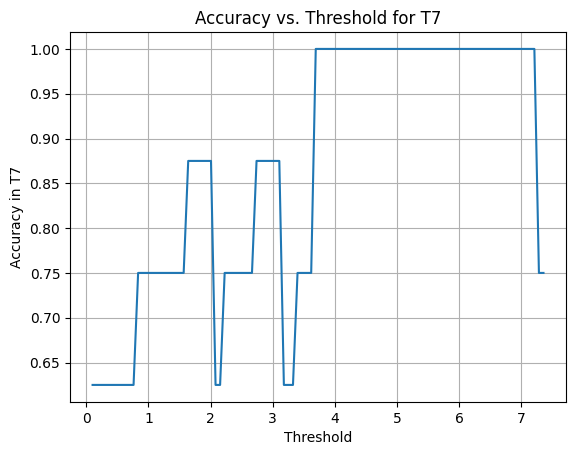

In [288]:
# Plot the graph
plt.plot(thresholds, accuracies_T7)
plt.xlabel('Threshold')
plt.ylabel('Accuracy in T7')
plt.title('Accuracy vs. Threshold for T7')
plt.grid(True)
plt.show()

In [289]:
# Define a tolerance level for considering thresholds
tolerance = 0.001

# Find the maximum accuracy
max_accuracy_T7 = max(accuracies_T7)

# Find the thresholds within the tolerance of the maximum accuracy
best_thresholds_T7 = [thresholds[i] for i, acc in enumerate(accuracies_T7) if abs(acc - max_accuracy_T7) < tolerance]

# Print the range of thresholds with the best accuracy
print("Thresholds with Best Accuracy for T7:", min(best_thresholds_T7), 'to', max(best_thresholds_T7))

Thresholds with Best Accuracy for T7: 3.6933333333333334 to 7.213333333333333


#### For T8

In [290]:
# Initialize lists to store accuracies and thresholds
accuracies_T8 = []

In [291]:
# Loop over each threshold
for threshold in thresholds:
    # Convert y values to labels based on the threshold
    y_train_labels = (y_train > threshold).astype(int)
    y_test_labels_T8 = (y_test_T8 > threshold).astype(int)
    
    # Initialize and train SVM classifier
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(averaged_X_train_centered, y_train_labels)
    
    # Make predictions on the testing dataset
    y_pred_T8 = svm_classifier.predict(averaged_X_test_T8_centered)
    
    # Calculate accuracy and append to accuracies list
    accuracy_T8 = accuracy_score(y_test_labels_T8, y_pred_T8)
    accuracies_T8.append(accuracy_T8)

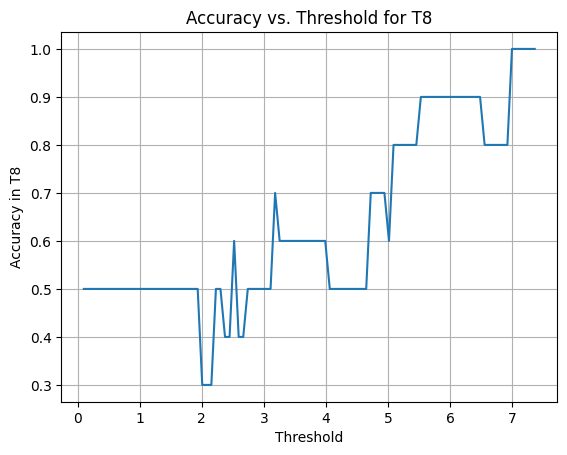

In [292]:
# Plot the graph
plt.plot(thresholds, accuracies_T8)
plt.xlabel('Threshold')
plt.ylabel('Accuracy in T8')
plt.title('Accuracy vs. Threshold for T8')
plt.grid(True)
plt.show()

In [293]:
# Define a tolerance level for considering thresholds
tolerance = 0.001

# Find the maximum accuracy
max_accuracy_T8 = max(accuracies_T8)

# Find the thresholds within the tolerance of the maximum accuracy
best_thresholds_T8 = [thresholds[i] for i, acc in enumerate(accuracies_T8) if abs(acc - max_accuracy_T8) < tolerance]

# Print the range of thresholds with the best accuracy
print("Thresholds with Best Accuracy for T8:", min(best_thresholds_T8), 'to', max(best_thresholds_T8))

Thresholds with Best Accuracy for T8: 6.993333333333333 to 7.36


# MLP Model Demo

### The following function takes a threshold and dataset to run against our trained model to determine if a sequence of waves will produce a crack larger than what is acceptable
#### Note - the superior performance of the SVM classifier makes that a better model for use.

In [294]:
def crack_too_big(cutoff,  dataset):
    dataset_preds = MLP_model.predict(dataset)
    print(f'The specified cutoff is {cutoff}mm.')
    for pred in dataset_preds:
        if pred > cutoff:
            print(f'The predicted crack length of {pred}mm is larger than the cutoff.')
        else:
            print(f'The predicted crack length of {pred}mm is smaller than the cutoff.')

In [295]:
crack_too_big(2.5, averaged_X_test_T8_centered)

The specified cutoff is 2.5mm.
The predicted crack length of 0.8676228698864764mm is smaller than the cutoff.
The predicted crack length of 1.774748744574856mm is smaller than the cutoff.
The predicted crack length of 2.1547775318402005mm is smaller than the cutoff.
The predicted crack length of 1.814933184093146mm is smaller than the cutoff.
The predicted crack length of 0.663347525946245mm is smaller than the cutoff.
The predicted crack length of 0.7875390842908242mm is smaller than the cutoff.
The predicted crack length of 1.2349055159055748mm is smaller than the cutoff.
The predicted crack length of 1.2596292580977135mm is smaller than the cutoff.
The predicted crack length of 1.8421241160946522mm is smaller than the cutoff.
The predicted crack length of 1.5675213546220914mm is smaller than the cutoff.


In [296]:
crack_too_big(2.5, averaged_X_test_T7_centered)

The specified cutoff is 2.5mm.
The predicted crack length of -0.7573476653331547mm is smaller than the cutoff.
The predicted crack length of 0.8404265325895935mm is smaller than the cutoff.
The predicted crack length of 0.9824983754139319mm is smaller than the cutoff.
The predicted crack length of 2.0750361550468504mm is smaller than the cutoff.
The predicted crack length of 5.6613211455611445mm is larger than the cutoff.
The predicted crack length of 1.53930346740132mm is smaller than the cutoff.
The predicted crack length of 4.6051454861533845mm is larger than the cutoff.
The predicted crack length of 6.377757131405577mm is larger than the cutoff.
